In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, Imputer, OneHotEncoder, LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import seaborn as sns
import operator
import math
import tensorflow as tf
from data_science import *

%matplotlib inline

/home/maxime/local/anaconda3/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [7]:
df_all = import_data('data/train.csv', 'data/test.csv', 'VARIABLE_CIBLE', na_values='(MISSING)') 
df_all0 = df_all[df_all.SOURCE_CITED_AGE == 'IMPUT']
df_all1 = df_all[df_all.SOURCE_CITED_AGE == 'CALC']


date_columns = ['PRIORITY_MONTH', 'FILING_MONTH', 'PUBLICATION_MONTH', 'BEGIN_MONTH']
drop_cols0 = ['NB_BACKWARD_NPL', 'NB_BACKWARD_PL', 'NB_BACKWARD_XY', 'oecd_NB_BACKWARD_PL']

preproc = Preprocessings(date_columns=date_columns)#, cols_toDrop=drop_cols0)

df0 = preproc.datetime_processings(df_all0, format='%m/%Y')
#df0 = preproc.drop_cols(df0)
df0 = preproc.cat_to_codes(df0)
df0 = df0.fillna(df0.median())

preproc = Preprocessings(date_columns=date_columns)#, cols_toDrop=drop_cols)

df1 = preproc.datetime_processings(df_all1, format='%m/%Y')
df1 = preproc.cat_to_codes(df1)
df1 = df1.fillna(df1.median())


df0_train, df0_eval = re_split(df0, 'VARIABLE_CIBLE')
df1_train, df1_eval = re_split(df1, 'VARIABLE_CIBLE')

keep_feat = Used_features('VARIABLE_CIBLE')

print(df0_eval.shape, df0_train.shape)
df0_eval = keep_feat.fit_transform(df0_eval)
df0_train = keep_feat.transform(df0_train)
print(df0_eval.shape, df0_train.shape)

keep_feat = Used_features('VARIABLE_CIBLE')

print(df1_eval.shape, df1_train.shape)
df1_eval = keep_feat.fit_transform(df1_eval)
df1_train = keep_feat.transform(df1_train)
print(df1_eval.shape, df1_train.shape)

df_train0, df_test0 = train_test_split(df0_train, test_size=0.2, random_state=42)
df_train1, df_test1 = train_test_split(df1_train, test_size=0.2, random_state=42)

features0 = df0_eval.columns.tolist()
features0.remove('index_origin')
features1 = df1_eval.columns.tolist()
features1.remove('index_origin')

(84092, 48) (167692, 49)
(84092, 37) (167692, 38)
(45623, 48) (91739, 49)
(45623, 46) (91739, 47)


/home/maxime/local/anaconda3/lib/python3.4/site-packages/pandas/core/frame.py:2265: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


# Features analysis

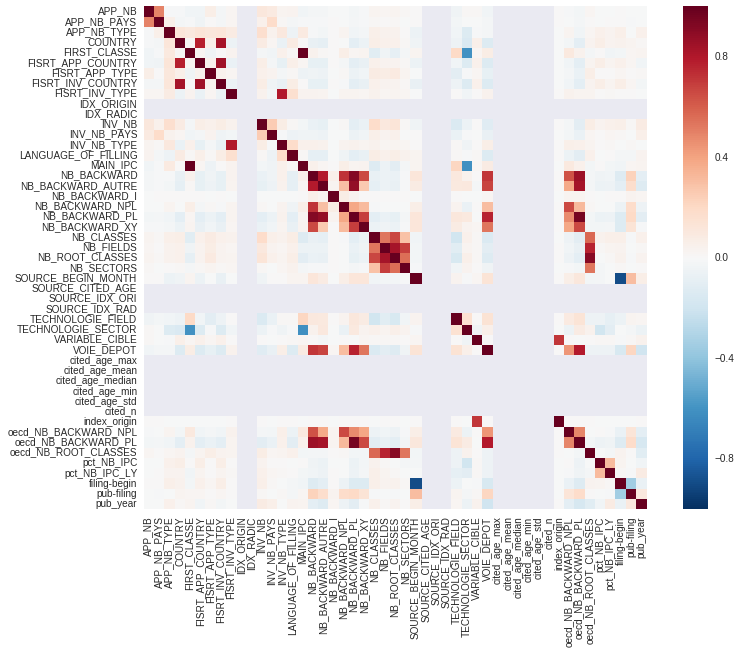

In [8]:
plt.figure(figsize=(13,9))
corr = df0.corr()
sns.heatmap(corr, square=True)

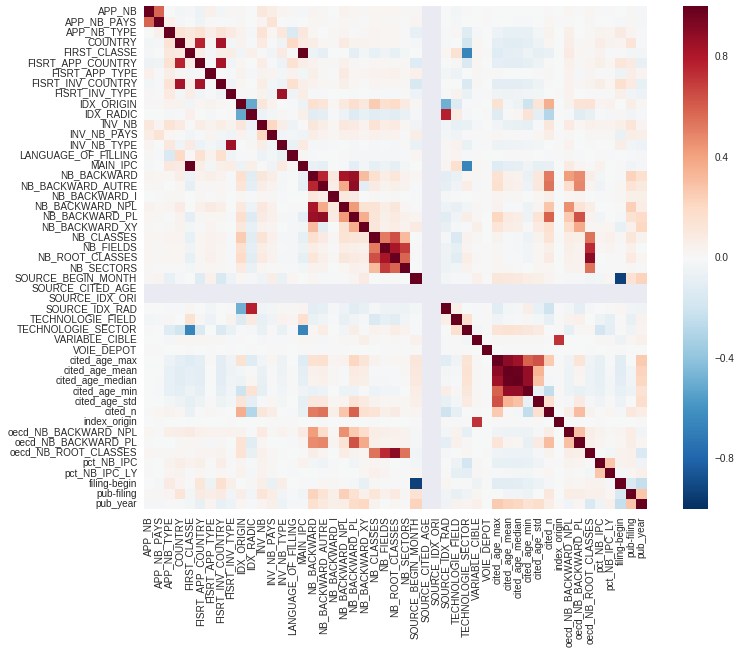

In [9]:
plt.figure(figsize=(13,9))
corr = df1.corr()
sns.heatmap(corr, square=True)

# removing correlated columns

In [3]:
df_all = import_data('data/train.csv', 'data/test.csv', 'VARIABLE_CIBLE', na_values='(MISSING)') 
df_all0 = df_all[df_all.SOURCE_CITED_AGE == 'IMPUT']
df_all1 = df_all[df_all.SOURCE_CITED_AGE == 'CALC']


date_columns = ['PRIORITY_MONTH', 'FILING_MONTH', 'PUBLICATION_MONTH', 'BEGIN_MONTH']
drop_cols0 = ['NB_BACKWARD_NPL', 'NB_BACKWARD_PL', 'NB_BACKWARD_XY', 'oecd_NB_BACKWARD_PL', 
              'oecd_NB_ROOT_CLASSES', 'SOURCE_BEGIN_MONTH', 'MAIN_IPC', 'FISRT_INV_COUNTRY']
drop_cols1 = ['MAIN_IPC', 'SOURCE_BEGIN_MONTH', 'cited_age_mean',  'NB_BACKWARD_NPL', 
              'NB_BACKWARD_PL', 'FISRT_INV_COUNTRY']

preproc = Preprocessings(date_columns=date_columns, cols_toDrop=drop_cols0)

df0 = preproc.datetime_processings(df_all0, format='%m/%Y')
df0 = preproc.drop_cols(df0)
df0 = preproc.cat_to_codes(df0)
df0 = df0.fillna(df0.median())

preproc = Preprocessings(date_columns=date_columns, cols_toDrop=drop_cols1)

df1 = preproc.datetime_processings(df_all1, format='%m/%Y')
df1 = preproc.cat_to_codes(df1)
df1 = df1.fillna(df1.median())


df0_train, df0_eval = re_split(df0, 'VARIABLE_CIBLE')
df1_train, df1_eval = re_split(df1, 'VARIABLE_CIBLE')

keep_feat = Used_features('VARIABLE_CIBLE')

print(df0_eval.shape, df0_train.shape)
df0_eval = keep_feat.fit_transform(df0_eval)
df0_train = keep_feat.transform(df0_train)
print(df0_eval.shape, df0_train.shape)

keep_feat = Used_features('VARIABLE_CIBLE')

print(df1_eval.shape, df1_train.shape)
df1_eval = keep_feat.fit_transform(df1_eval)
df1_train = keep_feat.transform(df1_train)
print(df1_eval.shape, df1_train.shape)

df_train0, df_test0 = train_test_split(df0_train, test_size=0.2, random_state=42)
df_train1, df_test1 = train_test_split(df1_train, test_size=0.2, random_state=42)

features0 = df0_eval.columns.tolist()
features0.remove('index_origin')
features1 = df1_eval.columns.tolist()
features1.remove('index_origin')

(84092, 40) (167692, 41)
(84092, 29) (167692, 30)
(45623, 48) (91739, 49)
(45623, 46) (91739, 47)


/home/maxime/local/anaconda3/lib/python3.4/site-packages/pandas/core/frame.py:2265: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


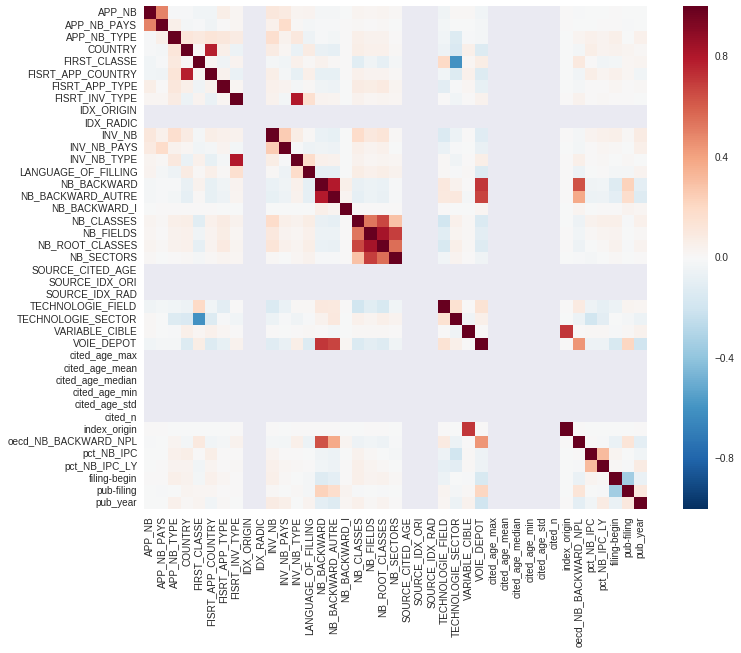

In [13]:
plt.figure(figsize=(13,9))
corr = df0.corr()
sns.heatmap(corr, square=True)

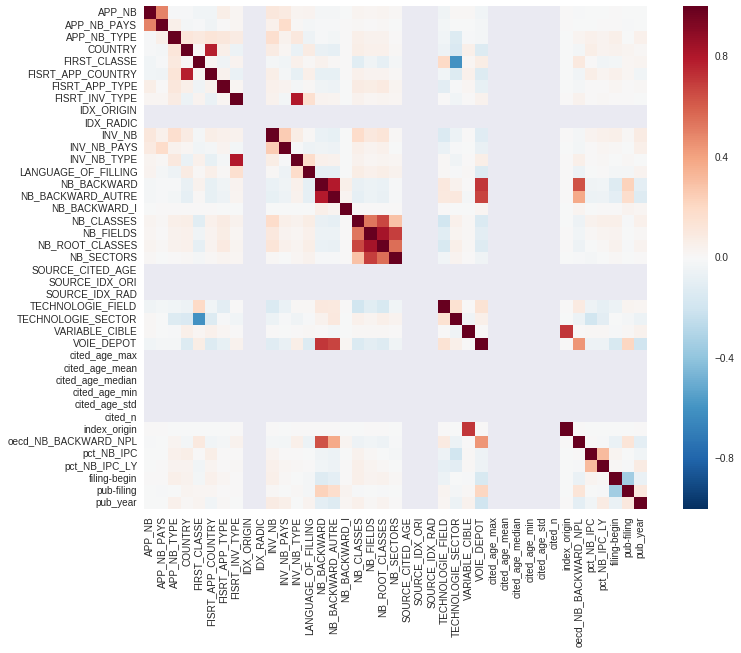

In [6]:
plt.figure(figsize=(13,9))
corr = df0.corr()
sns.heatmap(corr, square=True)

### Effects on the benchmark model

In [7]:
clf0 = RandomForestClassifier(n_estimators=1300, class_weight='balanced', 
                             min_samples_split=1, max_depth=None, n_jobs=6)

clf0.fit(df_train0[features0].values, df_train0.VARIABLE_CIBLE.values)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=1,
            min_weight_fraction_leaf=0.0, n_estimators=1300, n_jobs=6,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [8]:
Y_proba0 = clf0.predict_proba(df_test0[features0].values)
roc_auc = roc_auc_score(df_test0.VARIABLE_CIBLE.values, Y_proba0[:,1])

print('score', roc_auc)

score 0.692086297233


In [9]:
clf1 = RandomForestClassifier(n_estimators=1405, class_weight='balanced', 
                             min_samples_split=1, max_depth=None, n_jobs=6)

clf1.fit(df_train1[features1].values, df_train1.VARIABLE_CIBLE.values)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=1,
            min_weight_fraction_leaf=0.0, n_estimators=1405, n_jobs=6,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [10]:
Y_proba1 = clf1.predict_proba(df_test1[features1].values)
roc_auc = roc_auc_score(df_test1.VARIABLE_CIBLE.values, Y_proba1[:,1])

print('score', roc_auc)

score 0.691085239383


#### ===> Les résultats ne sont pas améliorés en enlevant les correlations les plus fortes, voire, ils sont moins bons que le benchmark

### New gridSearch

In [4]:
params = {'n_estimators':np.arange(1100,1500,50)}

est = RandomForestClassifier(n_jobs=6, min_samples_split=1, max_depth=None, class_weight='balanced')

clf0 = GridSearchCV(estimator=est, param_grid=params, verbose=3, scoring='roc_auc')

clf0.fit(df0_train[features0], df0_train['VARIABLE_CIBLE'])

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] n_estimators=1100 ...............................................
[CV] ...................... n_estimators=1100, score=0.694044 - 1.2min
[CV] n_estimators=1100 ...............................................
[CV] ...................... n_estimators=1100, score=0.697539 - 1.1min
[CV] n_estimators=1100 ...............................................
[CV] ...................... n_estimators=1100, score=0.693068 - 1.1min
[CV] n_estimators=1150 ...............................................
[CV] ...................... n_estimators=1150, score=0.694104 - 1.2min
[CV] n_estimators=1150 ...............................................
[CV] ...................... n_estimators=1150, score=0.697234 - 1.2min
[CV] n_estimators=1150 ...............................................
[CV] ...................... n_estimators=1150, score=0.693172 - 1.3min
[CV] n_estimators=1200 ...............................................
[CV] ............

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed: 31.9min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=1,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=6,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450])},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=3)

In [5]:
print(clf0.best_params_)
print(clf0.best_score_)

{'n_estimators': 1450}
0.695011623115


# Ajouts de scores

In [3]:
df_all = import_data('data/train.csv', 'data/test.csv', 'VARIABLE_CIBLE', na_values='(MISSING)') 
df_all0 = df_all[df_all.SOURCE_CITED_AGE == 'IMPUT']
df_all1 = df_all[df_all.SOURCE_CITED_AGE == 'CALC']


date_columns = ['PRIORITY_MONTH', 'FILING_MONTH', 'PUBLICATION_MONTH', 'BEGIN_MONTH']

preproc = Preprocessings(date_columns=date_columns)

df0 = preproc.datetime_processings(df_all0, format='%m/%Y')
df0 = preproc.cat_to_codes(df0)
df0 = df0.fillna(df0.median())

preproc = Preprocessings(date_columns=date_columns)

df1 = preproc.datetime_processings(df_all1, format='%m/%Y')
df1 = preproc.cat_to_codes(df1)
df1 = df1.fillna(df1.median())


### add scores 
df0 = preproc.create_score(df0, ['TECHNOLOGIE_SECTOR'], 'tech_sec_score')
df0 = preproc.create_score(df0, ['COUNTRY', 'TECHNOLOGIE_SECTOR'], 'success_index1')
df0 = preproc.create_score(df0, ['COUNTRY', 'TECHNOLOGIE_FIELD'], 'success_index2')
df0 = preproc.create_score(df0, ['COUNTRY'], 'country_score')
df0 = preproc.create_score(df0, ['TECHNOLOGIE_FIELD'], 'tech_field_score')

df1 = preproc.create_score(df1, ['TECHNOLOGIE_SECTOR'], 'tech_sec_score')
df1 = preproc.create_score(df1, ['COUNTRY', 'TECHNOLOGIE_SECTOR'], 'success_index1')
df1 = preproc.create_score(df1, ['COUNTRY', 'TECHNOLOGIE_FIELD'], 'success_index2')
df1 = preproc.create_score(df1, ['COUNTRY'], 'country_score')
df1 = preproc.create_score(df1, ['TECHNOLOGIE_FIELD'], 'tech_field_score')



### re_split
df0_train, df0_eval = re_split(df0, 'VARIABLE_CIBLE')
df1_train, df1_eval = re_split(df1, 'VARIABLE_CIBLE')

keep_feat = Used_features('VARIABLE_CIBLE')

print(df0_eval.shape, df0_train.shape)
df0_eval = keep_feat.fit_transform(df0_eval)
df0_train = keep_feat.transform(df0_train)
print(df0_eval.shape, df0_train.shape)

keep_feat = Used_features('VARIABLE_CIBLE')

print(df1_eval.shape, df1_train.shape)
df1_eval = keep_feat.fit_transform(df1_eval)
df1_train = keep_feat.transform(df1_train)
print(df1_eval.shape, df1_train.shape)

df_train0, df_test0 = train_test_split(df0_train, test_size=0.2, random_state=42)
df_train1, df_test1 = train_test_split(df1_train, test_size=0.2, random_state=42)

features0 = df0_eval.columns.tolist()
features0.remove('index_origin')
features1 = df1_eval.columns.tolist()
features1.remove('index_origin')

(84092, 53) (167692, 54)
(84092, 42) (167692, 43)
(45623, 53) (91739, 54)
(45623, 51) (91739, 52)


/home/maxime/local/anaconda3/lib/python3.4/site-packages/pandas/core/frame.py:2265: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


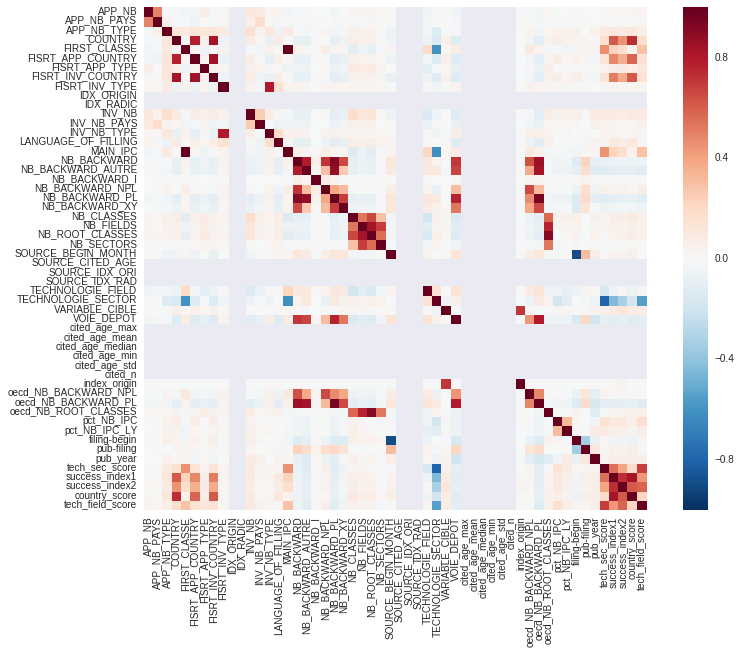

In [3]:
plt.figure(figsize=(13,9))
corr = df0.corr()
sns.heatmap(corr, square=True)

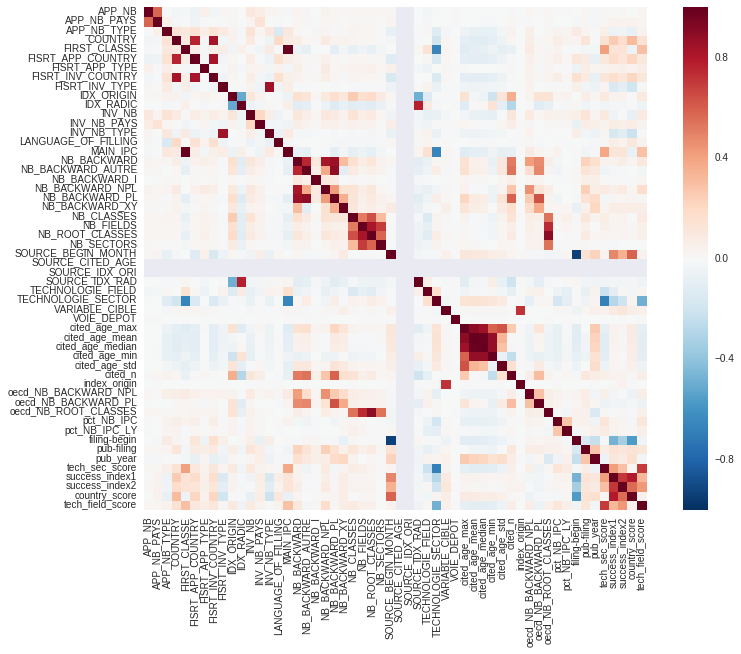

In [5]:
plt.figure(figsize=(13,9))
corr = df1.corr()
sns.heatmap(corr, square=True)

## GridsearchCV

In [6]:
params = {'n_estimators':np.arange(1000,1600,100)}

est = RandomForestClassifier(n_jobs=6, min_samples_split=1, max_depth=None, class_weight='balanced')

clf0 = GridSearchCV(estimator=est, param_grid=params, verbose=3, scoring='roc_auc')

clf0.fit(df0_train[features0], df0_train['VARIABLE_CIBLE'])

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] n_estimators=1000 ...............................................
[CV] ...................... n_estimators=1000, score=0.695816 - 1.2min
[CV] n_estimators=1000 ...............................................
[CV] ...................... n_estimators=1000, score=0.699206 - 1.2min
[CV] n_estimators=1000 ...............................................
[CV] ...................... n_estimators=1000, score=0.694925 - 1.2min
[CV] n_estimators=1100 ...............................................
[CV] ...................... n_estimators=1100, score=0.696057 - 1.3min
[CV] n_estimators=1100 ...............................................
[CV] ...................... n_estimators=1100, score=0.699776 - 1.4min
[CV] n_estimators=1100 ...............................................
[CV] ...................... n_estimators=1100, score=0.694643 - 1.5min
[CV] n_estimators=1200 ...............................................
[CV] ............

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 27.8min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=1,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=6,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([1000, 1100, 1200, 1300, 1400, 1500])},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=3)

In [ ]:
print(clf0.best_params_)
print(clf0.best_score_)

{'n_estimators': 1500}
0.696932584354


In [8]:
### TODO #########################################################
params = {'n_estimators':np.arange(1000,1600,100)}

est = RandomForestClassifier(n_jobs=6, min_samples_split=1, max_depth=None, class_weight='balanced')

clf1 = GridSearchCV(estimator=est, param_grid=params, verbose=3, scoring='roc_auc')
clf1.fit(df_train1[features1], df_train1['VARIABLE_CIBLE'])

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=1,
            min_weight_fraction_leaf=0.0, n_estimators=1405, n_jobs=6,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
print(clf1.best_params_)
print(clf1.best_score_)